Igor Martins Frota

Student Number: 1011330490

03-10-2024

# Pre-lecture

## 1.

The "**Standard Deviation (SD)**" is the measure of a dataset's disperson relative to its mean (i.e. it indicates the distance of individual data points relative to the mean).

The "**Standard Error of the Mean (SEM)**", by contrast, is how inaccurate the standard deviation of the sampling distribution of the sample mean is in comparison to the true population mean.

The difference between the SD and the SEM is that the former measures how far apart individual values are from the mean, while the SEM measures how accurate the sample mean is to the true population mean. Thus, while both measure the distance from the mean, the SD measures the distance between values and the mean while the SEM measures the distance between the sample mean and the population mean.

### ChatGPT Session Summary
"
1. **Standard Deviation (SD)**:
   - Measures the spread of data points around the mean in a dataset.
   - A larger SD indicates greater variability among the data points.

2. **Standard Error of the Mean (SEM)**:
   - Measures how much the sample mean is expected to vary from the true population mean.
   - Calculated using the formula: 
     \[
     \text{SEM} = \frac{\text{SD}}{\sqrt{N}}
     \]
     Where \( N \) is the sample size.

3. **Sampling Distribution of the Sample Mean**:
   - Refers to the distribution of means from many random samples of the same size taken from a population.
   - If you plot these sample means, you typically get a normal distribution, especially with larger sample sizes due to the Central Limit Theorem.

4. **True Population Mean**:
   - The actual average of all values in a population, denoted by \( \mu \).
   - It’s often unknown and estimated using the sample mean.

5. **Sample Mean**:
   - The average calculated from a single sample, denoted by \( \bar{x} \).
   - Used to estimate the true population mean.

6. **Standard Error vs. Sampling Distribution**:
   - The **Standard Error** is a single value that indicates how much the sample mean might vary from the population mean.
   - The **Sampling Distribution** is the entire distribution of all possible sample means if you were to take many samples.

7. **Difference Between Spread and Distribution**:
   - **Distribution** describes the overall shape and arrangement of data points (e.g., normal, uniform).
   - **Spread** refers to the variability or range of the data (e.g., how far apart data points are from each other).

This session covered fundamental statistical concepts related to sampling, variability, and how we use samples to make inferences about populations. If you have any further questions or need clarification on any of these points, feel free to ask!
"

### ChatGPT Session Link
[STA130 - Week 04 - Homework - Question 1](https://chatgpt.com/share/66ff10bb-1064-8001-ba0c-38d04bd3d850)

# Post-lecture

## 6.

### 1.

Bootstrapping is a process where we basically start off with creating a set of data called a "Bootstrapped Dataset". So, we do this by randomly selecting values from the original set (and if we get a value more than one time that's ok). We want to keep doing this until we have the same total number of values as our original set. Afterwards, we calculate any statistic we want to (such as the average or the middle value), and we keep track of the value of the statistic (such as by plotting it on a graph). We keep repeating this process a certian number of times, and at the end, we look at our graph and determine which values occur most often.

### 2. 

The purpose of bootstrapping is basically to mathematically repeat an experiment multiple times so that we can see which values occur the most. This is good for two main reasons: 
1. Bootstrapping is sometimes better than just repeating the experiment itself, which can take a large amount of time and money.
2. We can avoid external factors that may influence the results by re-running the experiment itself

### 3.

Bootstrapping can be used to asses whether or not this guess might be plausible by figuring out if it is in the 95% confidence interval. Basically, the confidence interval is a range encompasing 95% of the resulting statistics after Bootstrapped the dataset. As a result, we can say that we are 95% confident that the actual true population statistic is inside this range.

# 8.

In [8]:
import pandas as pd
from io import StringIO

AliTech_New_Vaccine_Results = """Patient_ID,Age,Gender,Initial_Health_Score,Final_Health_Score
1, 45, M, 84, 86
2, 34, F, 78, 86
3, 29, M, 83, 80
4, 52, F, 81, 86
5, 37, M, 81, 84
6, 41, F, 80, 86
7, 33, M, 79, 86
8, 48, F, 85, 82
9, 26, M, 76, 83
10, 39, F, 83, 84
"""

data = StringIO(AliTech_New_Vaccine_Results)
df = pd.read_csv(data)
df.to_csv('AliTech_New_Vaccine_Results.csv', index=False)
print(df)

   Patient_ID  Age Gender  Initial_Health_Score  Final_Health_Score
0           1   45      M                    84                  86
1           2   34      F                    78                  86
2           3   29      M                    83                  80
3           4   52      F                    81                  86
4           5   37      M                    81                  84
5           6   41      F                    80                  86
6           7   33      M                    79                  86
7           8   48      F                    85                  82
8           9   26      M                    76                  83
9          10   39      F                    83                  84


## Problem Introduction

A Null hypothesis of "no effect" refers to a hypothesis that claims, after analyzing the data using various methods such as bootstrapping, the vaccine has no effect in changing the final health score of patients.

In [9]:
df['Change_in_Health_Score'] = df['Final_Health_Score'] - df['Initial_Health_Score']
df

,Patient_ID,Age,Gender,Initial_Health_Score,Final_Health_Score,Change_in_Health_Score
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


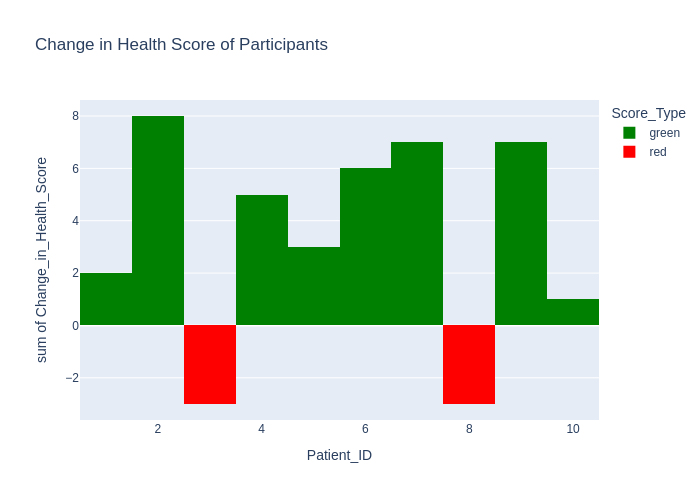

In [10]:
import plotly.express as px

# Creating a histogram for the difference in health scores

df['Score_Type'] = df['Change_in_Health_Score'].apply(lambda x: 'green' if x > 0 else 'red')
fig = px.histogram(df, x="Patient_ID", y="Change_in_Health_Score", nbins=15,
                   title='Change in Health Score of Participants',
                   color='Score_Type',
                   color_discrete_map={'green': 'green', 'red': 'red'})
fig.show(renderer="png")

As the purpose of this analysis is to determine whether the vaccine has an effect or not, this graph gives a visual representation of the effect. By calculating the change in health scores of participants and displaying the results on a histogram, it is clear that, for 80% of participants, the vaccine improved their health score.

## Quantitative Analysis

In [11]:
filtered_data = df[df['Change_in_Health_Score'] > 0]
mean_value_delta_health_score_greater_0 = filtered_data['Change_in_Health_Score'].mean()
print(mean_value_delta_health_score_greater_0)

4.875


As shown by this caluclation, for participants who benefited from the vaccine, they saw an average of a 4.875 point increase in their health score.

In [12]:
mean_value_delta_health_score = df['Change_in_Health_Score'].mean()
print(mean_value_delta_health_score)

3.3


All participants saw an average increase of 3.3 in their health score by 3.3 points. This includes those who saw a decrease in their health score due to the vaccine.

Therefore, the vaccine increased participants' health scores by an average of 3.3 points. To test if this number is reflective of what all humans (if given the vaccine) would experience, we would bootstrap the data.

In [13]:
import numpy as np

def bootstrap(Change_in_Health_Score, num_samples = 10, statistic_func=np.mean, num_iterations=1000):
    
    bootstrap_statistic = []
    
    for i in range(num_iterations):
        resample = np.random.choice(Change_in_Health_Score, size=num_samples, replace=True)
        statistic = statistic_func(resample)
        bootstrap_statistic.append(statistic)
    return np.array(bootstrap_statistic)

change_in_health_score = df['Change_in_Health_Score']
bootstrap_means = bootstrap(Change_in_Health_Score = change_in_health_score, num_samples=len(change_in_health_score), statistic_func=np.mean, num_iterations=1000)
    
print(f"Bootstrap Mean Estimate: {np.mean(bootstrap_means)}")
print(f"Bootstrap 95% Confidence Interval: {np.percentile(bootstrap_means, [2.5, 97.5])}")

Bootstrap Mean Estimate: 3.2473
Bootstrap 95% Confidence Interval: [0.8 5.5]


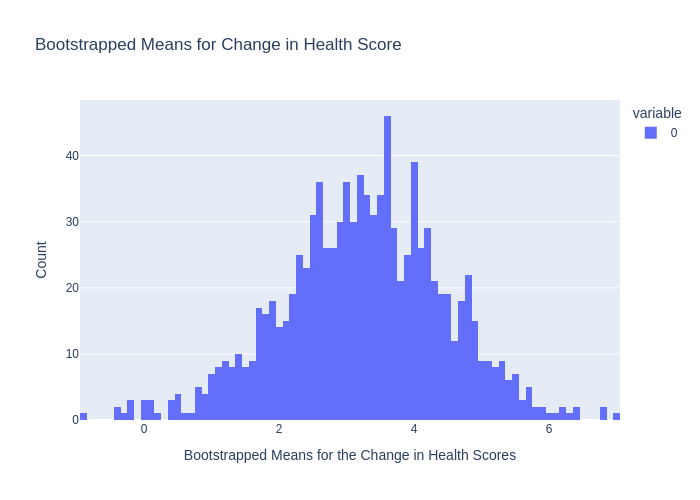

In [22]:
fig = px.histogram(bootstrap_means, nbins=100, title='Bootstrapped Means for Change in Health Score', labels={'Value':'Bootstrapped Means'})
fig.update_layout(xaxis_title="Bootstrapped Means for the Change in Health Scores", yaxis_title="Count")
fig.show(renderer="png")

After bootstrapping the dataset, it becomes clear that the overall average effect of the vaccine is a 3.25 point increase in health scores. Thus, we are 95% confident that this vaccine would increase patients' health scores by this amount. The Null Hypothesis of "no effect" can therefore be disregarded as a result of the calculations and explanations above.

### ChatGPT Session Summary

"
In our session, we covered several topics related to Python data manipulation and visualization using libraries like `plotly` and `pandas`. Here's a summary of the key points we discussed:

1. **Creating Visualizations with Plotly**:
   - You created **histograms**, **box plots**, and **stacked plots** using `plotly.express`.
   - We worked on plotting **side-by-side box plots** and **stacked histograms** to compare different data columns such as `Initial_Health_Score` and `Final_Health_Score`.
   - We fixed issues with specifying the correct data columns and formatting color schemes for visualizations.

2. **Handling Data in Pandas**:
   - We used **`melt`** to transform data from wide format to long format for easier plotting.
   - You learned how to calculate the **difference between two columns** (`Initial_Health_Score` and `Final_Health_Score`) and display that change in plots.
   - We used **conditional coloring** for visualizing whether changes were positive or negative.

3. **Bootstrapping**:
   - We discussed the concept of **bootstrapping** and implemented it using a Python function.
   - You learned how to **resample data with replacement** and calculate bootstrapped statistics like the **mean** and **confidence intervals**.
   - You correctly implemented a **bootstrapping function** for your dataset, specifically for the `Change_in_Health_Score` column.
   
4. **Bootstrapped Data Visualization**:
   - We created a **histogram** to visualize the distribution of **bootstrapped means**.
   - I helped resolve errors around the `x` argument and plot labeling.

By the end, you successfully calculated bootstrapped statistics and visualized them using `plotly` histograms!
"

### ChatGPT Session Link
[STA130 - Week 04 - Homework - Question 8](https://chatgpt.com/share/6708a199-cc5c-8001-a0d6-7d8ba40ec2aa)